In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/riverr/PaperDoubleFig.mplstyle')
from scipy.io import loadmat
import subprocess as sp
import matlab.engine

In [2]:
def run_mat(P1, P2):
    with open('baseline_sim.m', 'r') as f:
        lines = f.readlines()
    
    newlines = []
    for line in lines:
        if line.startswith('P1'):
            newlines.append(f'P1 = {P1};\n')
        elif line.startswith('P2'):
            newlines.append(f'P2 = {P2};\n')
        else:
            newlines.append(line)
    
    with open('new_sim.m', 'w') as f:
        f.writelines(newlines)
        
    eng = matlab.engine.start_matlab()
    eng.new_sim(nargout=0)
    eng.quit()
    

In [5]:
def process_output(bc, nbins):
    dat = loadmat(f'{bc}.mat', simplify_cells=True)[bc]
    wit_idx = (dat['Q']==np.min(np.unique(dat['Q'])))&(dat['stop']==0)
    drive_idx = (dat['Q']==np.max(np.unique(dat['Q'])))&(dat['stop']==0)
    bunch_sep = np.abs(np.mean(dat['x'][4,drive_idx]) - np.mean(dat['x'][4,wit_idx]))
    
    zs = np.linspace(dat['x'][4,drive_idx].min(), dat['x'][4,drive_idx].max(), nbins)
    curs = []
    dz = np.mean(np.diff(zs))
    for i, z in enumerate(zs):
        new_idx = (dat['x'][4,drive_idx]>zs.min()+i*dz)&(dat['x'][4,drive_idx]<=zs.min()+(i+1)*dz)
        curs.append(np.sum(dat['Q'][drive_idx][new_idx])/(dz/3e8))
    return bunch_sep, np.max(curs)


In [6]:
P1s = np.linspace(-9, -3, 15)
seps = np.zeros_like(P1s)
curs = np.zeros_like(P1s)
for i, P1 in enumerate(P1s):
    print(P1)
    run_mat(P1, 0)
    res = (process_output('bc20', 200))
    seps[i] = res[0]
    curs[i] = res[1]

-9.0
-8.571428571428571
-8.142857142857142
-7.714285714285714
-7.285714285714286
-6.857142857142858
-6.428571428571429
-6.0
-5.571428571428571
-5.142857142857143
-4.714285714285714
-4.285714285714286
-3.8571428571428577
-3.428571428571429
-3.0


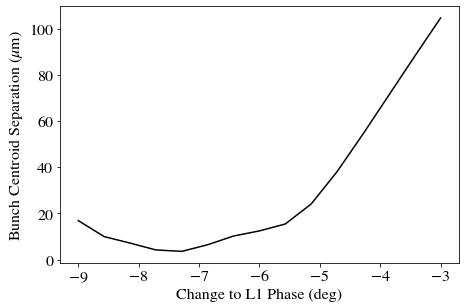

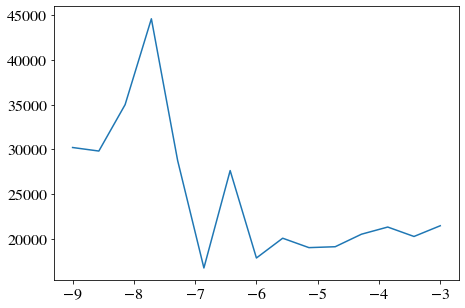

In [8]:
plt.plot(P1s, 1e6*np.array(seps), 'k')
plt.xlabel('Change to L1 Phase (deg)')
plt.ylabel('Bunch Centroid Separation ($\mu$m)')
plt.show()
plt.plot(P1s, curs)

np.savetxt('p1_scan.txt', np.array([P1s, seps]).T)

In [23]:
P2s = np.linspace(-5, 0, 10)
seps_p2 = np.zeros_like(P2s)
curs_p2 = np.zeros_like(P2s)
for i, P2 in enumerate(P2s):
    print(P2)
    run_mat(-7.5, P2)
    res = (process_output('bc20', 200))
    seps_p2[i] = res[0]
    curs_p2[i] = res[1]

-5.0
-4.444444444444445
-3.888888888888889
-3.333333333333333
-2.7777777777777777
-2.2222222222222223
-1.6666666666666665
-1.1111111111111107
-0.5555555555555554
0.0


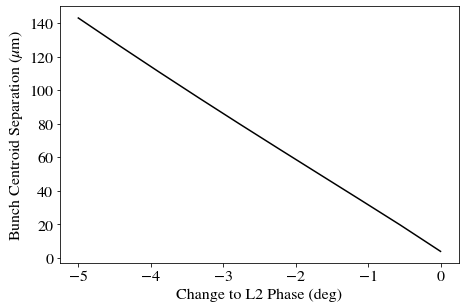

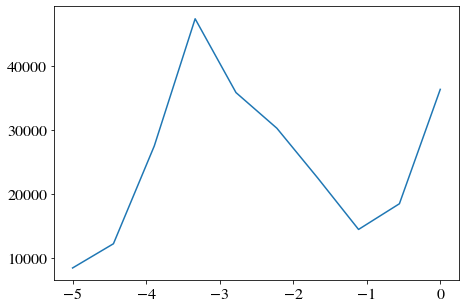

In [25]:
plt.plot(P2s, 1e6*np.array(seps_p2), 'k')
plt.xlabel('Change to L2 Phase (deg)')
plt.ylabel('Bunch Centroid Separation ($\mu$m)')
plt.show()
plt.plot(P2s, curs_p2)
np.savetxt('p2_scan_p1_-7.5.txt', np.array([P2s, seps_p2]).T)

In [26]:
run_mat(-7.5, -3.3)
dat = loadmat('bc20.mat', simplify_cells=True)['bc20']

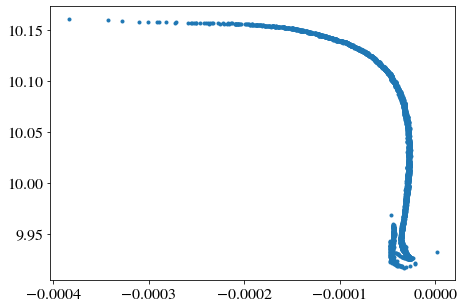

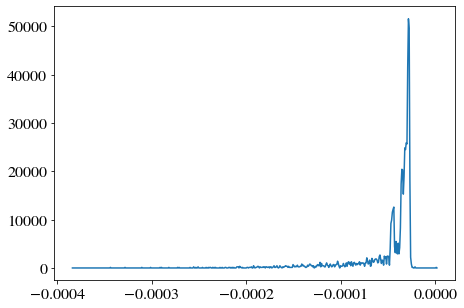

In [27]:
idx = (dat['Q']==np.max(np.unique(dat['Q'])))&(dat['stop']==0)
plt.plot(dat['x'][4,idx], dat['x'][5,idx], '.')
nbins = 500
zs = np.linspace(dat['x'][4,idx].min(), dat['x'][4,idx].max(), nbins)
charge = []
dz = np.mean(np.diff(zs))
for i, z in enumerate(zs):
    new_idx = (dat['x'][4,idx]>zs.min()+i*dz)&(dat['x'][4,idx]<=zs.min()+(i+1)*dz)
    charge.append(np.sum(dat['Q'][idx][new_idx])/(dz/3e8))
plt.show()
plt.plot(zs, charge)

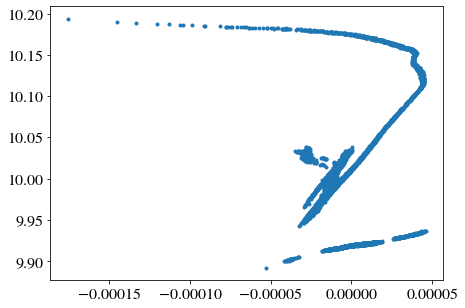

In [14]:
idx = dat['stop']==0
plt.plot(dat['x'][4,idx], dat['x'][5,idx], '.')